In [47]:
import os
import sys
import random
import pickle

sys.path.append('..')
sys.path.append('../src')
sys.path.append('../results')

import git
import numpy as np
import seaborn as sns

from scipy import stats

import matplotlib.pyplot as plt
import matplotlib_inline
%matplotlib inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [48]:
dataset = 'email-eucore'
experiment = 'random'

In [49]:
rootpath = git.Repo(os.getcwd(), search_parent_directories=True).git.rev_parse("--show-toplevel")
resultspath = f'results/experiment_sequential_{experiment}'
filepath = lambda x, y: f'{dataset}_{x}.{y}'

In [50]:
model = 'joint'
result = 'lls'

lls = {}
with open(os.path.join(rootpath, resultspath, filepath(model, result)), 'r') as infile:
    infile.readline()
    for line in infile:
        t1, t2, p, ll = line.strip().split(',')
        t1, t2, p, ll = (int(t1), int(t2), float(p), float(ll))
        
        if (t1, t2) in lls:
            if p in lls[(t1, t2)]:
                lls[(t1, t2)][p] += [ll]
            else:
                lls[(t1, t2)][p] = [ll]
        else:
            lls[(t1, t2)] = {}
            lls[(t1, t2)][p] = [ll]

ValueError: too many values to unpack (expected 4)

In [51]:
time_pairs = list(lls.keys())
probs = list(lls[time_pairs[0]].keys())
display(time_pairs, probs)
# nptime_pairs = np.asarray(sorted(time_pairs, key=lambda x: x[0]))
# npprobs = np.asarray(sorted(probs))
# display(nptime_pairs, npprobs)

# lls[(nptime_pairs[0, 0], nptime_pairs[0, 1])]

IndexError: list index out of range

In [52]:
for t1, t2 in time_pairs:
    ax = plt.axes()
    # t1, t2 = (197001, 197002)

    xs = list(lls[(t1, t2)].keys())
    ys = list(lls[(t1, t2)][p][0] for p in xs)
    ax.set_title(f'{t1} → {t2}')
    ax.set_xlabel('% of edges rewired')
    ax.set_ylabel('log likelihood')
    plt.plot(xs, ys)
    plt.show()

In [53]:
lls[(t1, t2)][0.0][0]

KeyError: (197106, 197203)

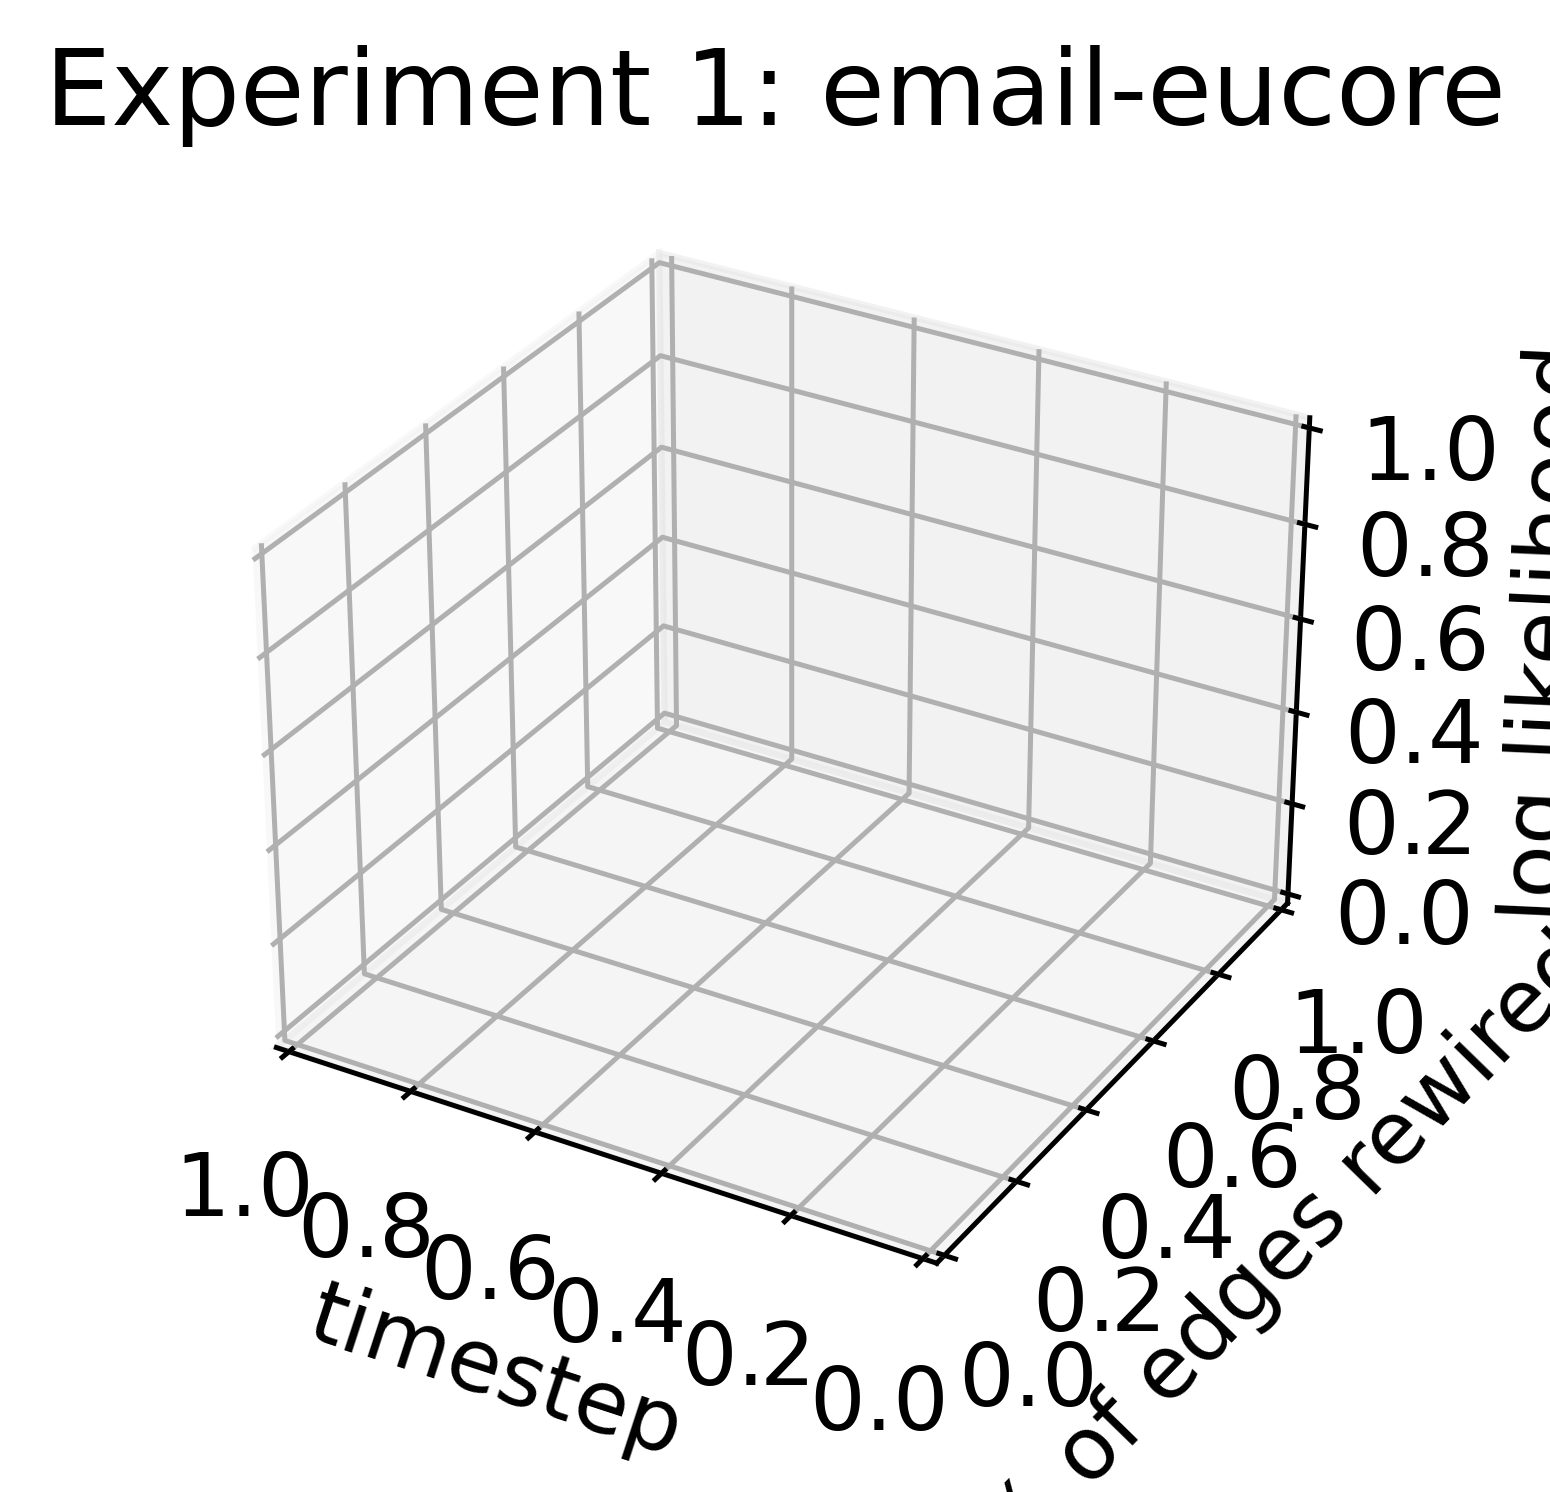

In [54]:
args = ['ipynb',
        'use_mathtext',
        'colors5-light',
       ] if True else []

rhos = dict()

with plt.style.context(args):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.ticklabel_format(style='plain')

    ps = np.asarray(sorted(probs))
    for t1, t2 in time_pairs[:11]:
        z = min(t1, t2)
        ys = [lls[(t1, t2)][p][0] for p in ps]
        # yavg = [np.mean(loaded[x]) for x in xs]
        # ymax = [np.max(loaded[x]) for x in xs]
        # ymin = [np.min(loaded[x]) for x in xs]

        rho = stats.spearmanr(xs, ys)
        # rhos[lookback] = round(rho.correlation, 4)

        ax.plot([z for _ in ps], xs, ys)

    ax.set_title(f'Experiment 1: {dataset}')
    ax.set_xlabel('timestep')
    ax.set_ylabel('% of edges rewired')
    ax.set_zlabel('log likelihood')
    # ax.legend([f'lookback = {x},    rho = {rhos[x]}' for x in lookbacks], bbox_to_anchor=(1.2, 1.05))
    plt.gca().invert_xaxis()
    # plt.savefig(f'../figures/exp1_{dataset}_3D.svg', bbox_inches='tight')
    

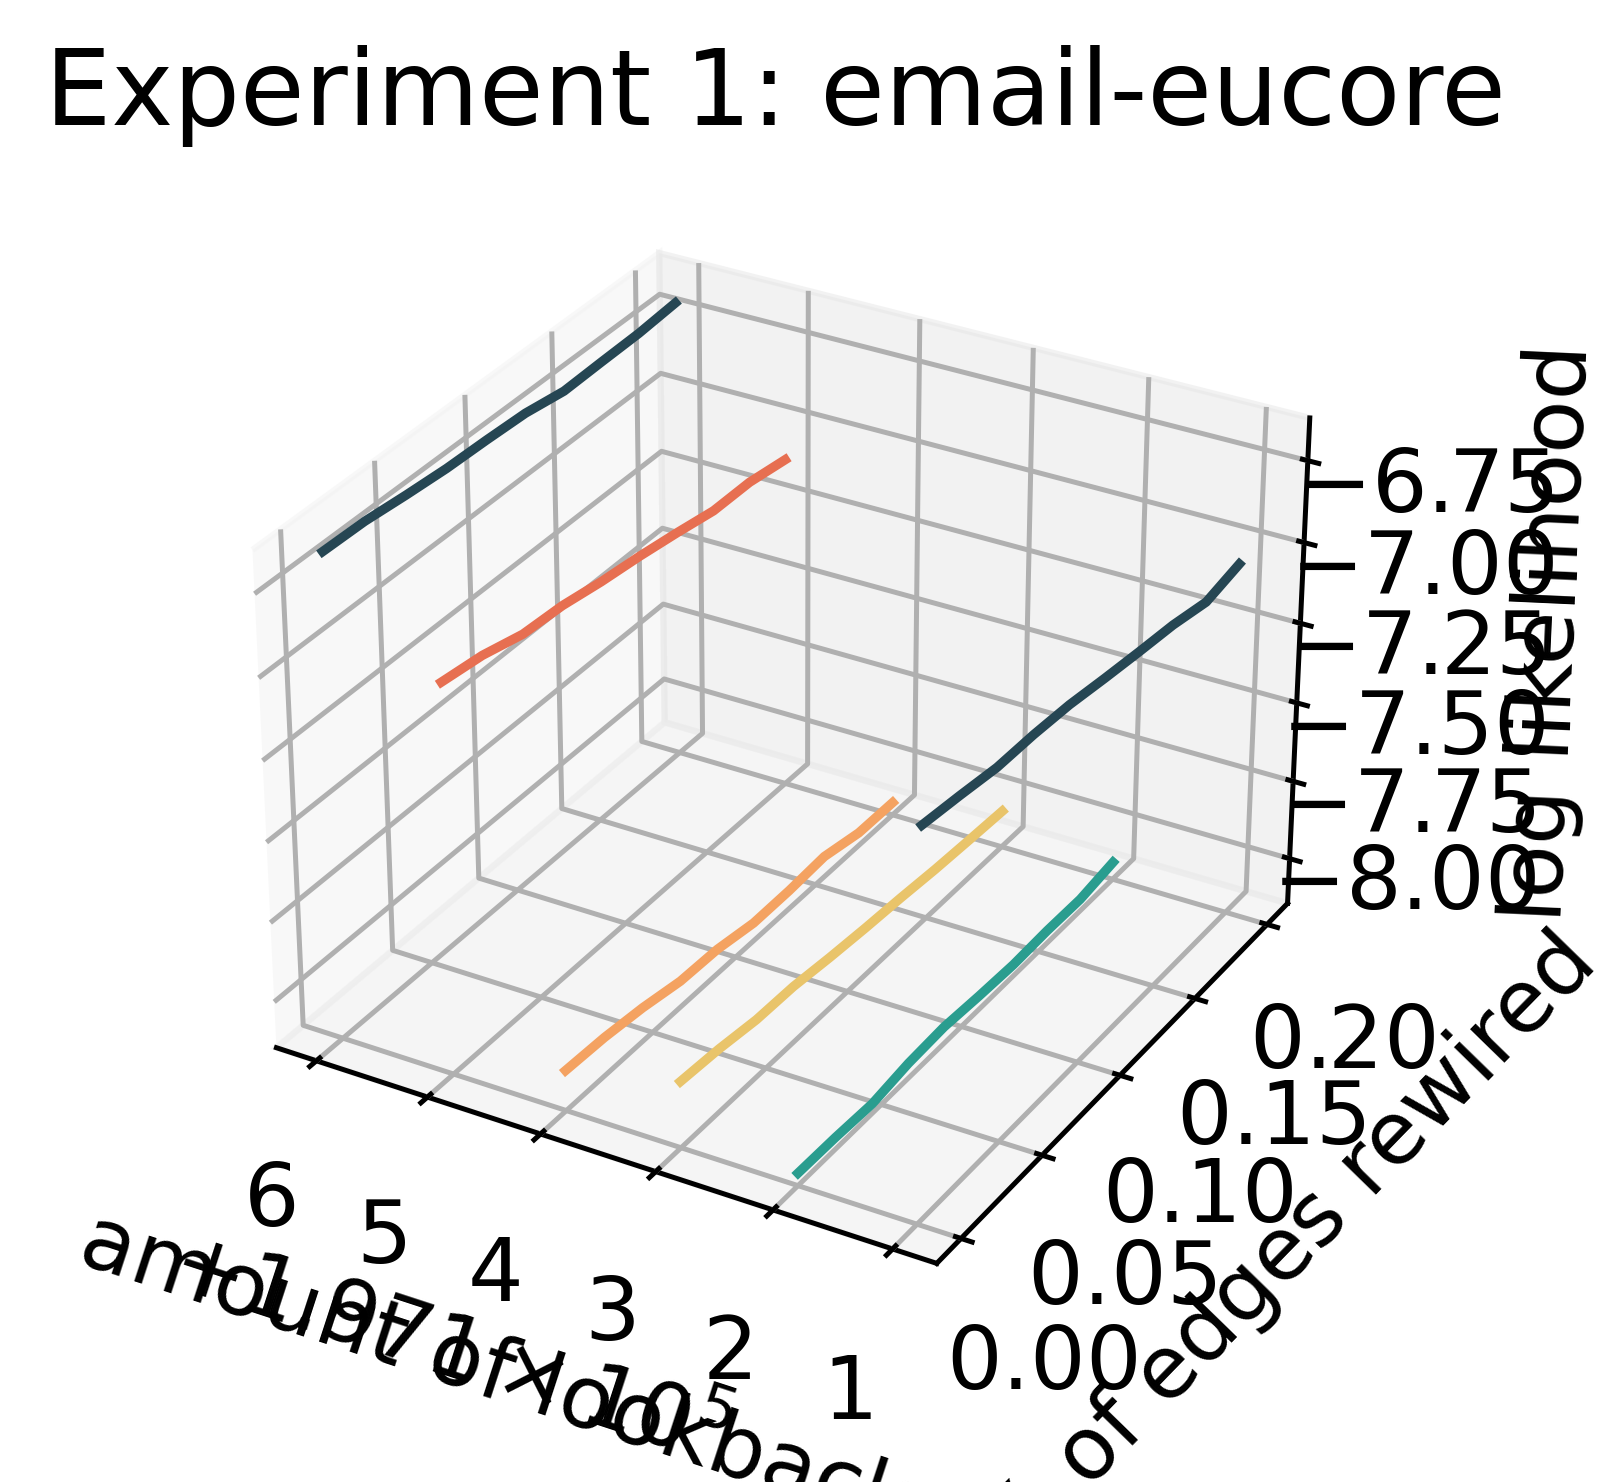

In [46]:
args = ['ipynb',
        'use_mathtext',
        'colors5-light',
       ] if True else []

rhos = dict()

with plt.style.context(args):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.ticklabel_format(style='plain')

    ps = np.asarray(sorted(probs))
    for t1, t2 in time_pairs[12:]:
        z = min(t1, t2)
        ys = [lls[(t1, t2)][p][0] for p in ps]
        # yavg = [np.mean(loaded[x]) for x in xs]
        # ymax = [np.max(loaded[x]) for x in xs]
        # ymin = [np.min(loaded[x]) for x in xs]

        rho = stats.spearmanr(xs, ys)
        # rhos[lookback] = round(rho.correlation, 4)

        ax.plot([z for _ in ps], xs, ys)

    ax.set_title(f'Experiment 1: {dataset}')
    ax.set_xlabel('amount of lookback')
    ax.set_ylabel('% of edges rewired')
    ax.set_zlabel('log likelihood')
    # ax.legend([f'lookback = {x},    rho = {rhos[x]}' for x in lookbacks], bbox_to_anchor=(1.2, 1.05))
    plt.gca().invert_xaxis()
    # plt.savefig(f'../figures/exp1_{dataset}_3D.svg', bbox_inches='tight')
    